## Progetto Process Monitoring

Dataset: https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset

Piattaforma: https://github.com/amazon-science/chronos-forecasting

#### Librerie da importare

In [6]:
import pandas as pd
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import os
import torch
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

#### PIPELINE Chronos

In [7]:
# Lista delle pipeline

# Tiny
pipeline_tiny = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

# Mini
pipeline_mini = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-mini",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

# Small
pipeline_small = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

# Base
pipeline_base = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-base",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

# Large
pipeline_large = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-large",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

#### Processamento dati

In [8]:
path1 = "archive/1st_test/1st_test"         # Path set 1
path2 = "archive/2nd_test/2nd_test"         # Path set 2
path3 = "archive/3rd_test/4th_test/txt"     # Path set 3

nrow = 20480            # Numero di righe da caricare per ogni file
nfile1 = 2000           # Numero di file da caricare per il set 1
nfile2 = 980            # Numero di file da caricare per il set 2
nfile3 = 3000           # Numero di file da caricare per il set 3
n_test = 64             # Numero di righe da usare per il test


# Funzione per caricare i dati
def load_data(path, num_rows, num_files):
    file_list = sorted(os.listdir(path))[:num_files]  # Carica solo i primi num_files file
    data = []
    for file_name in file_list:
        file_path = os.path.join(path, file_name)
        # Specifica il delimitatore come tabulazione
        df = pd.read_csv(file_path, header=None, delimiter="\t", nrows=num_rows)
        # Converti i dati in float
        data.append(df.astype(float).values)
    return np.vstack(data)  # Concatena i dati lungo l'asse 0


# Carica i file dal set 1
data1 = load_data(path1, num_rows=nrow, num_files=nfile1)
# Separa i dati in training e test
train_data_set1 = data1[:-n_test]
test_data_set1 = data1[-n_test:]


# Carica i file dal set 2
data2 = load_data(path2, num_rows=nrow, num_files=nfile2)
# Separa i dati in training e test
train_data_set2 = data2[:-n_test]
test_data_set2 = data2[-n_test:]

# Carica i file dal set 3
data3 = load_data(path3, num_rows=nrow, num_files=nfile3)
# Separa i dati in training e test
train_data_set3 = data3[:-n_test]
test_data_set3 = data3[-n_test:]

## USO LE PIPELINE SUL SET 1

#### PIPELINE TINY

Mean Absolute Error (MAE) per feature: [0.06300432 0.05128718 0.07537374 0.05468682 0.07801578 0.07642454
 0.04305155 0.07353921]


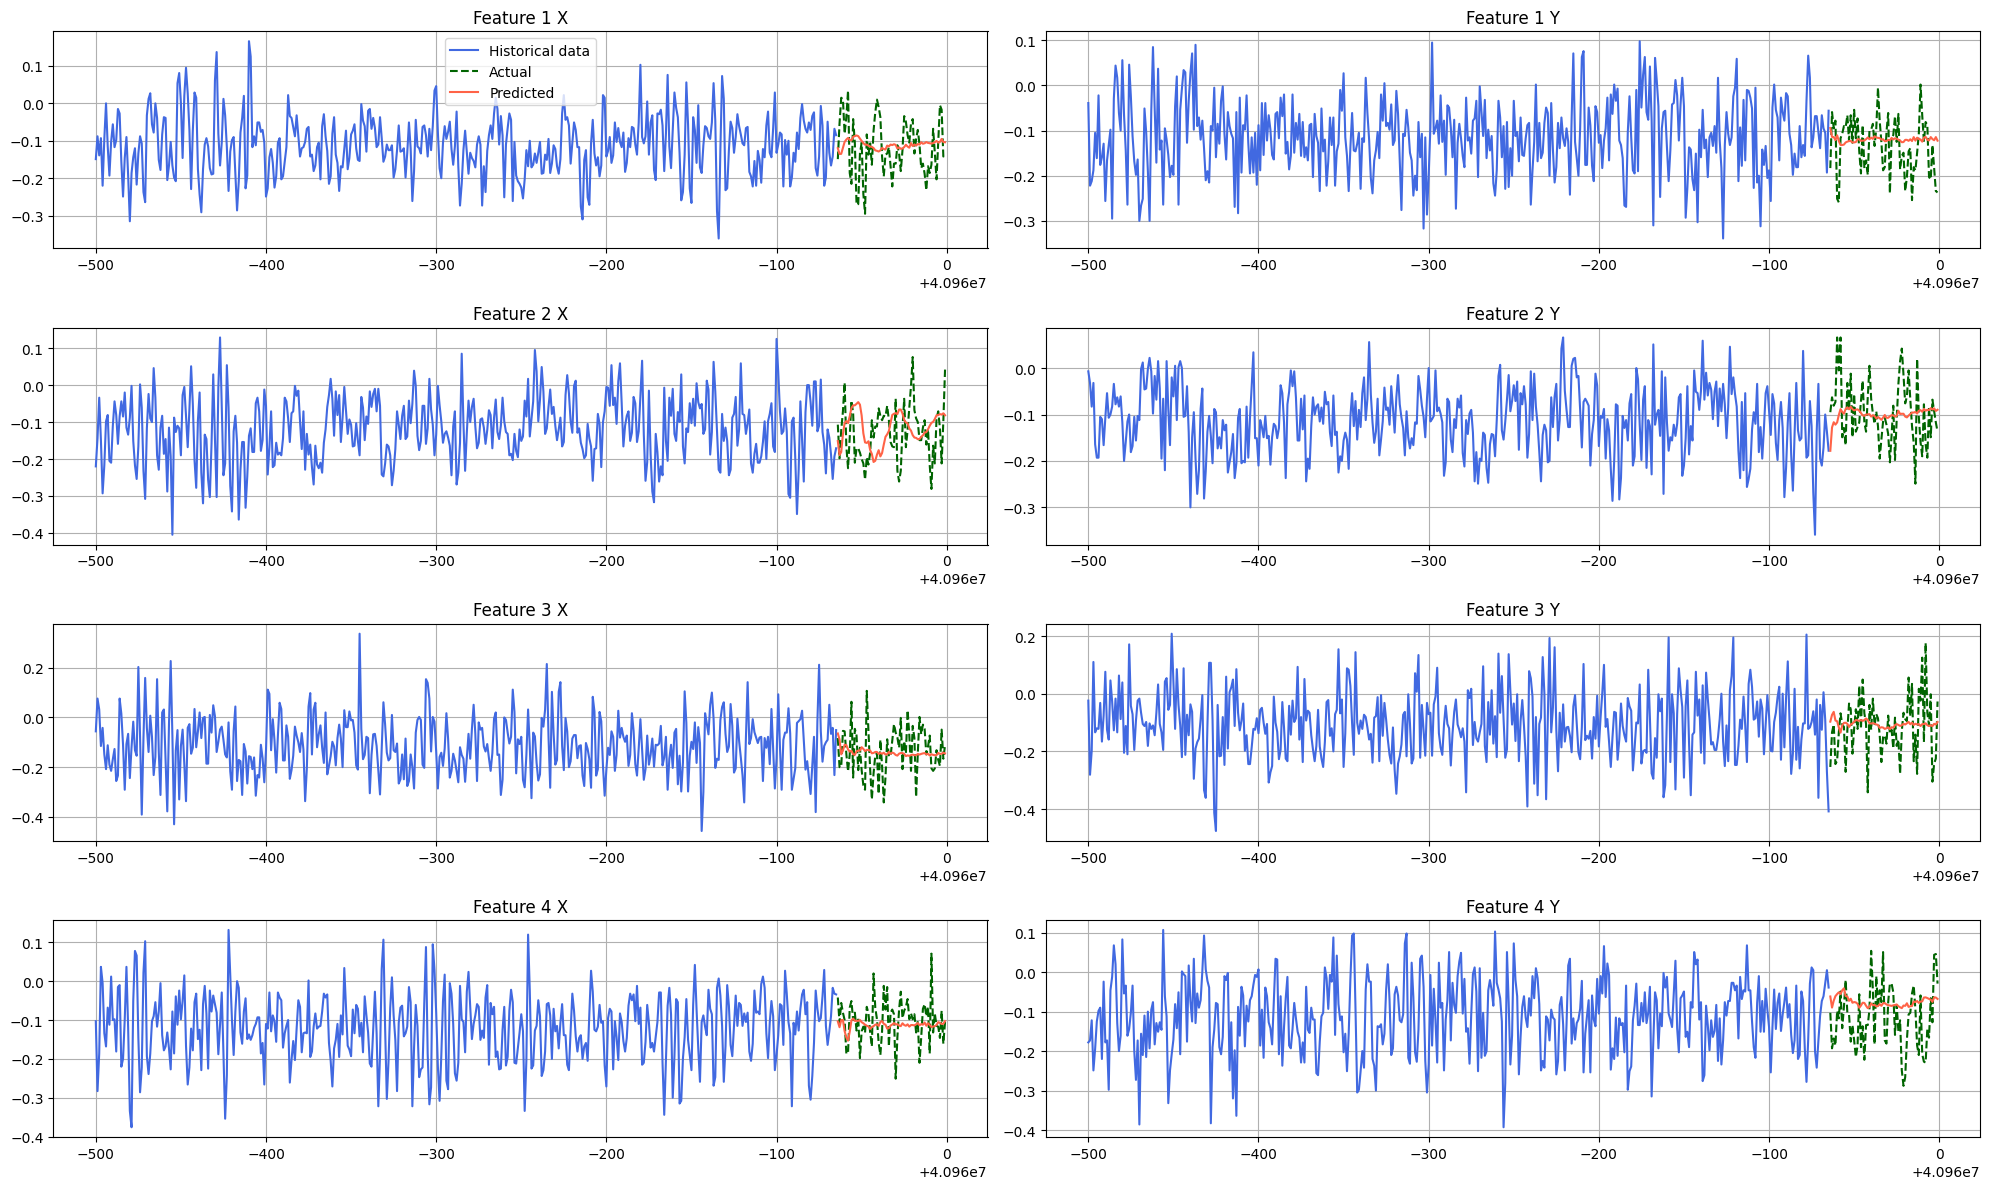

In [9]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set1).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_tiny.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set1
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(20, 12))
total_data_length = len(train_data_set1) + len(test_data_set1)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1] // 2, 2, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set1))
    limited_test_indices = np.arange(len(train_data_set1), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set1[start_idx - len(train_data_set1):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i // 2 + 1} {'X' if i % 2 == 0 else 'Y'}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE MINI

Mean Absolute Error (MAE) per feature: [0.06093287 0.0527667  0.07271092 0.05230226 0.0758356  0.0777219
 0.05488611 0.07215217]


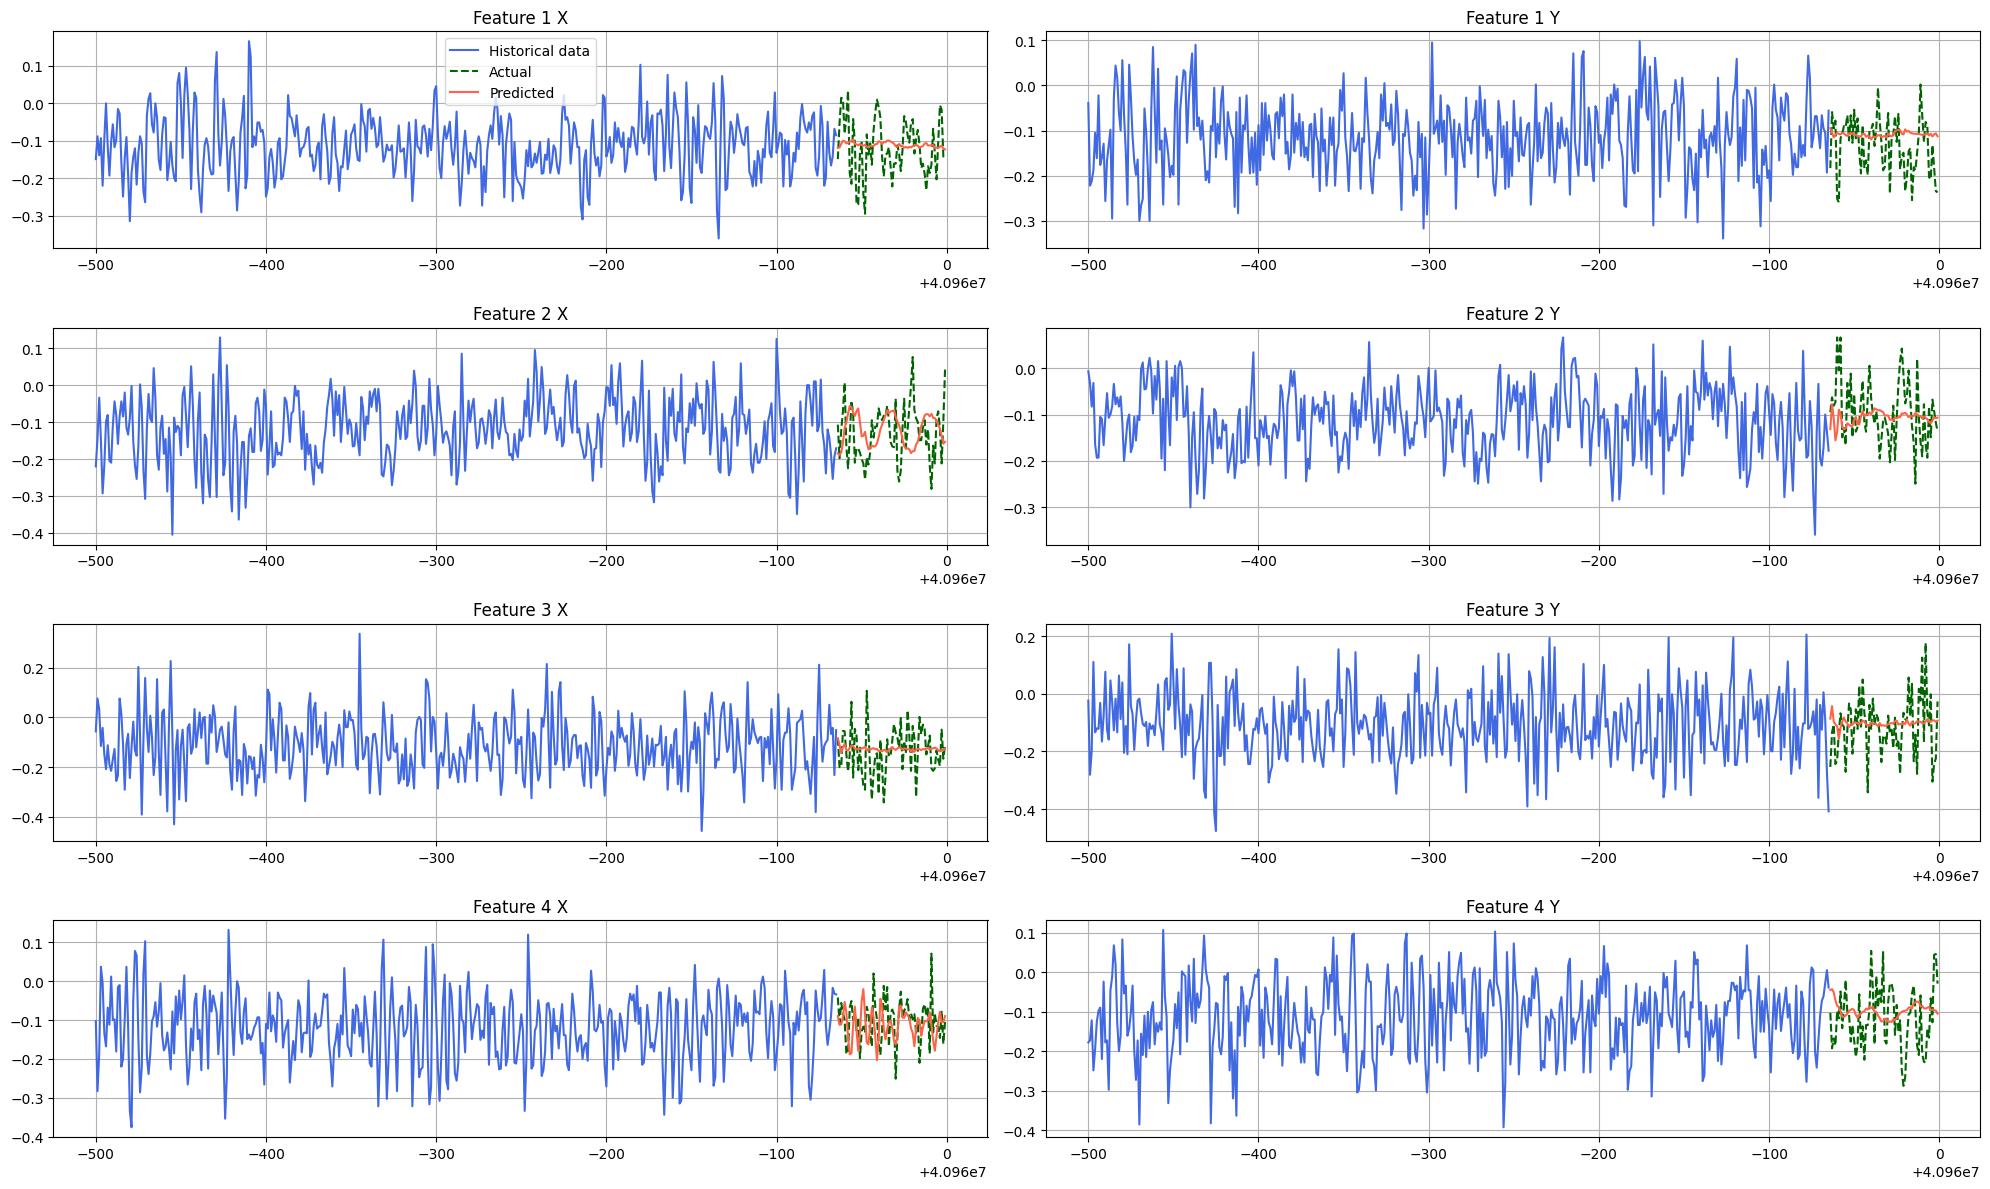

In [10]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set1).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_mini.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set1
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(20, 12))
total_data_length = len(train_data_set1) + len(test_data_set1)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1] // 2, 2, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set1))
    limited_test_indices = np.arange(len(train_data_set1), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set1[start_idx - len(train_data_set1):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i // 2 + 1} {'X' if i % 2 == 0 else 'Y'}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE SMALL

Mean Absolute Error (MAE) per feature: [0.06110616 0.05129482 0.07161007 0.05335566 0.07729929 0.07674725
 0.04748026 0.06688067]


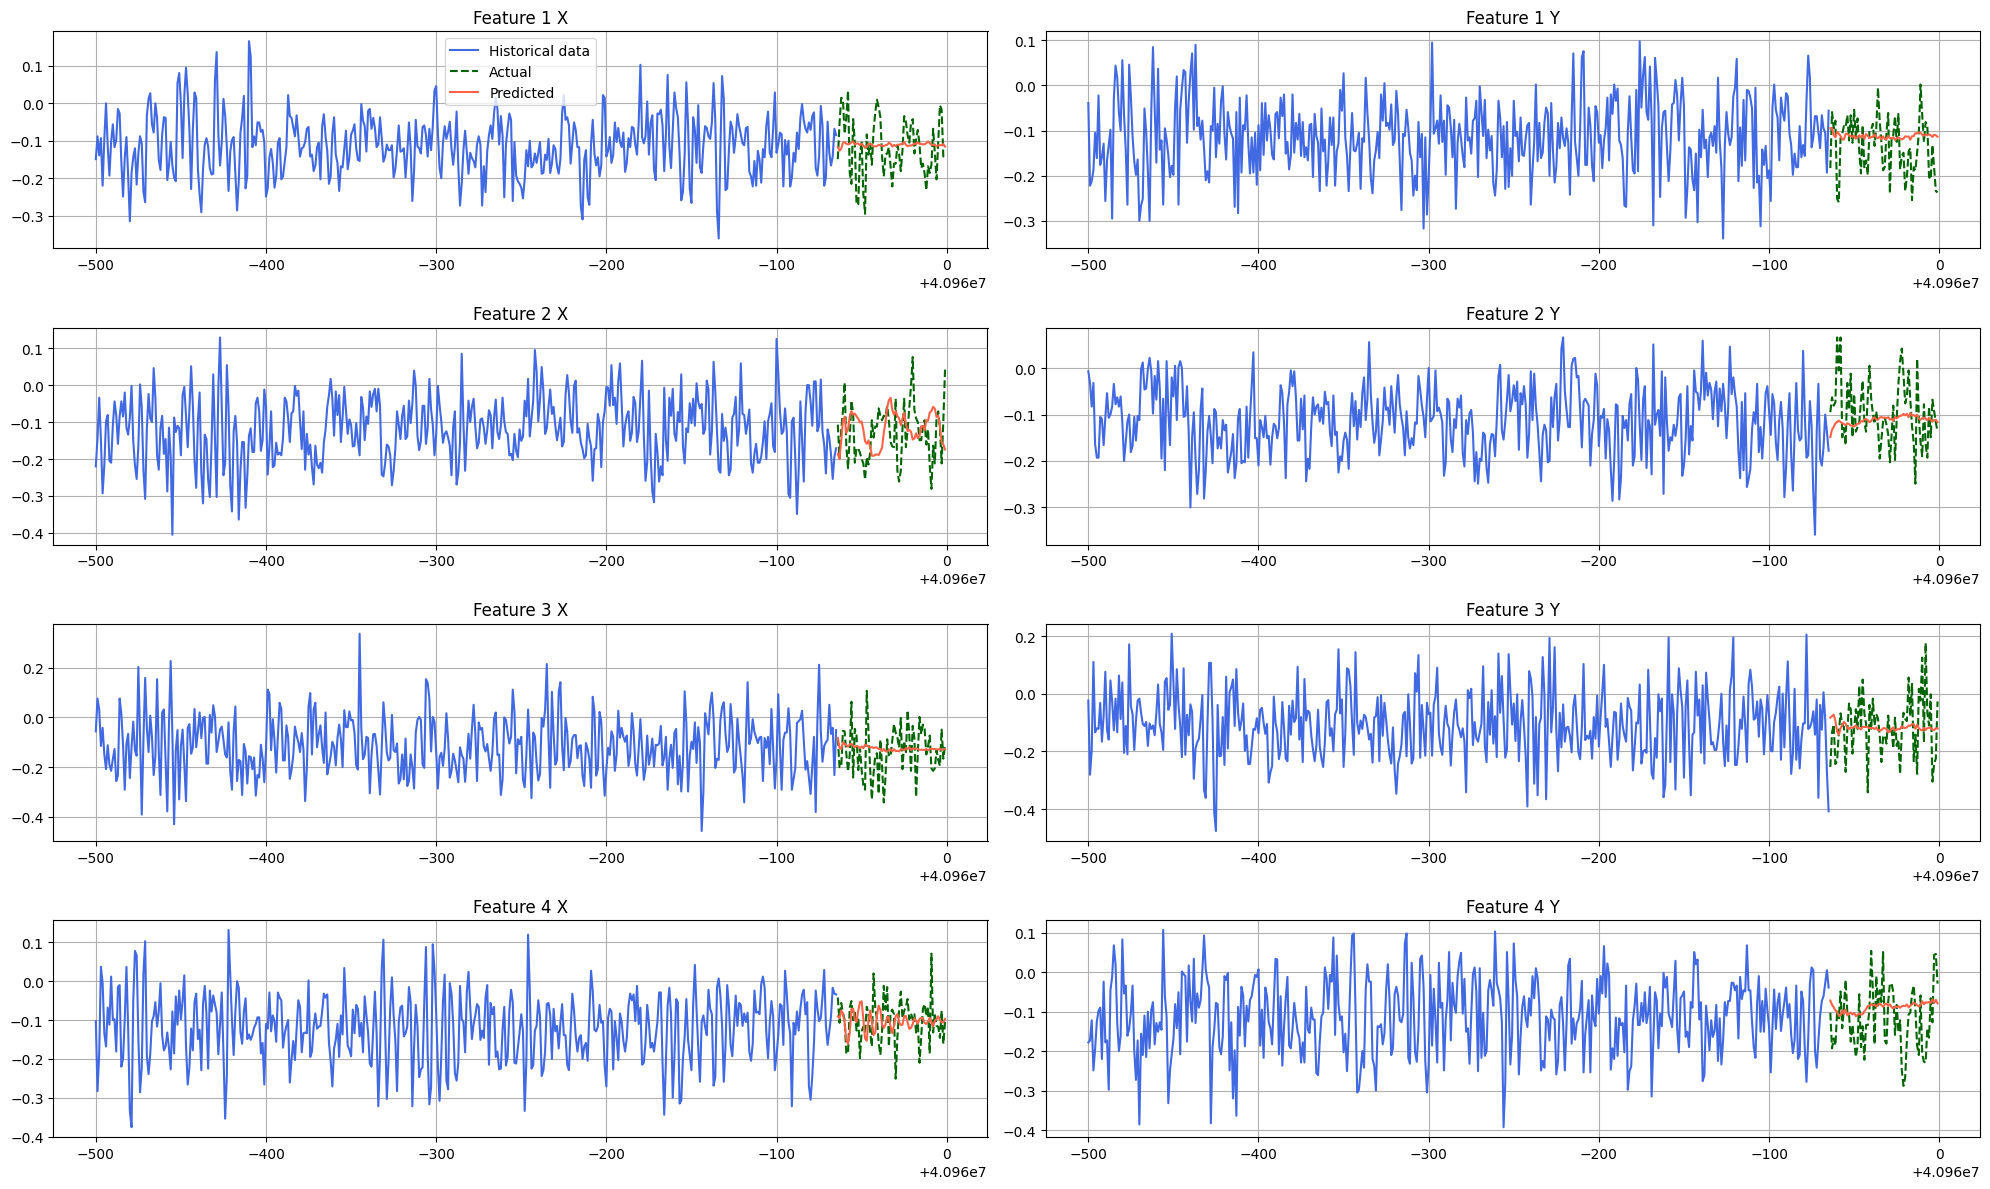

In [11]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set1).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_small.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set1
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(20, 12))
total_data_length = len(train_data_set1) + len(test_data_set1)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1] // 2, 2, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set1))
    limited_test_indices = np.arange(len(train_data_set1), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set1[start_idx - len(train_data_set1):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i // 2 + 1} {'X' if i % 2 == 0 else 'Y'}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE BASE

Mean Absolute Error (MAE) per feature: [0.06052794 0.05261312 0.06426366 0.06194105 0.08140021 0.07388375
 0.04631423 0.0715154 ]


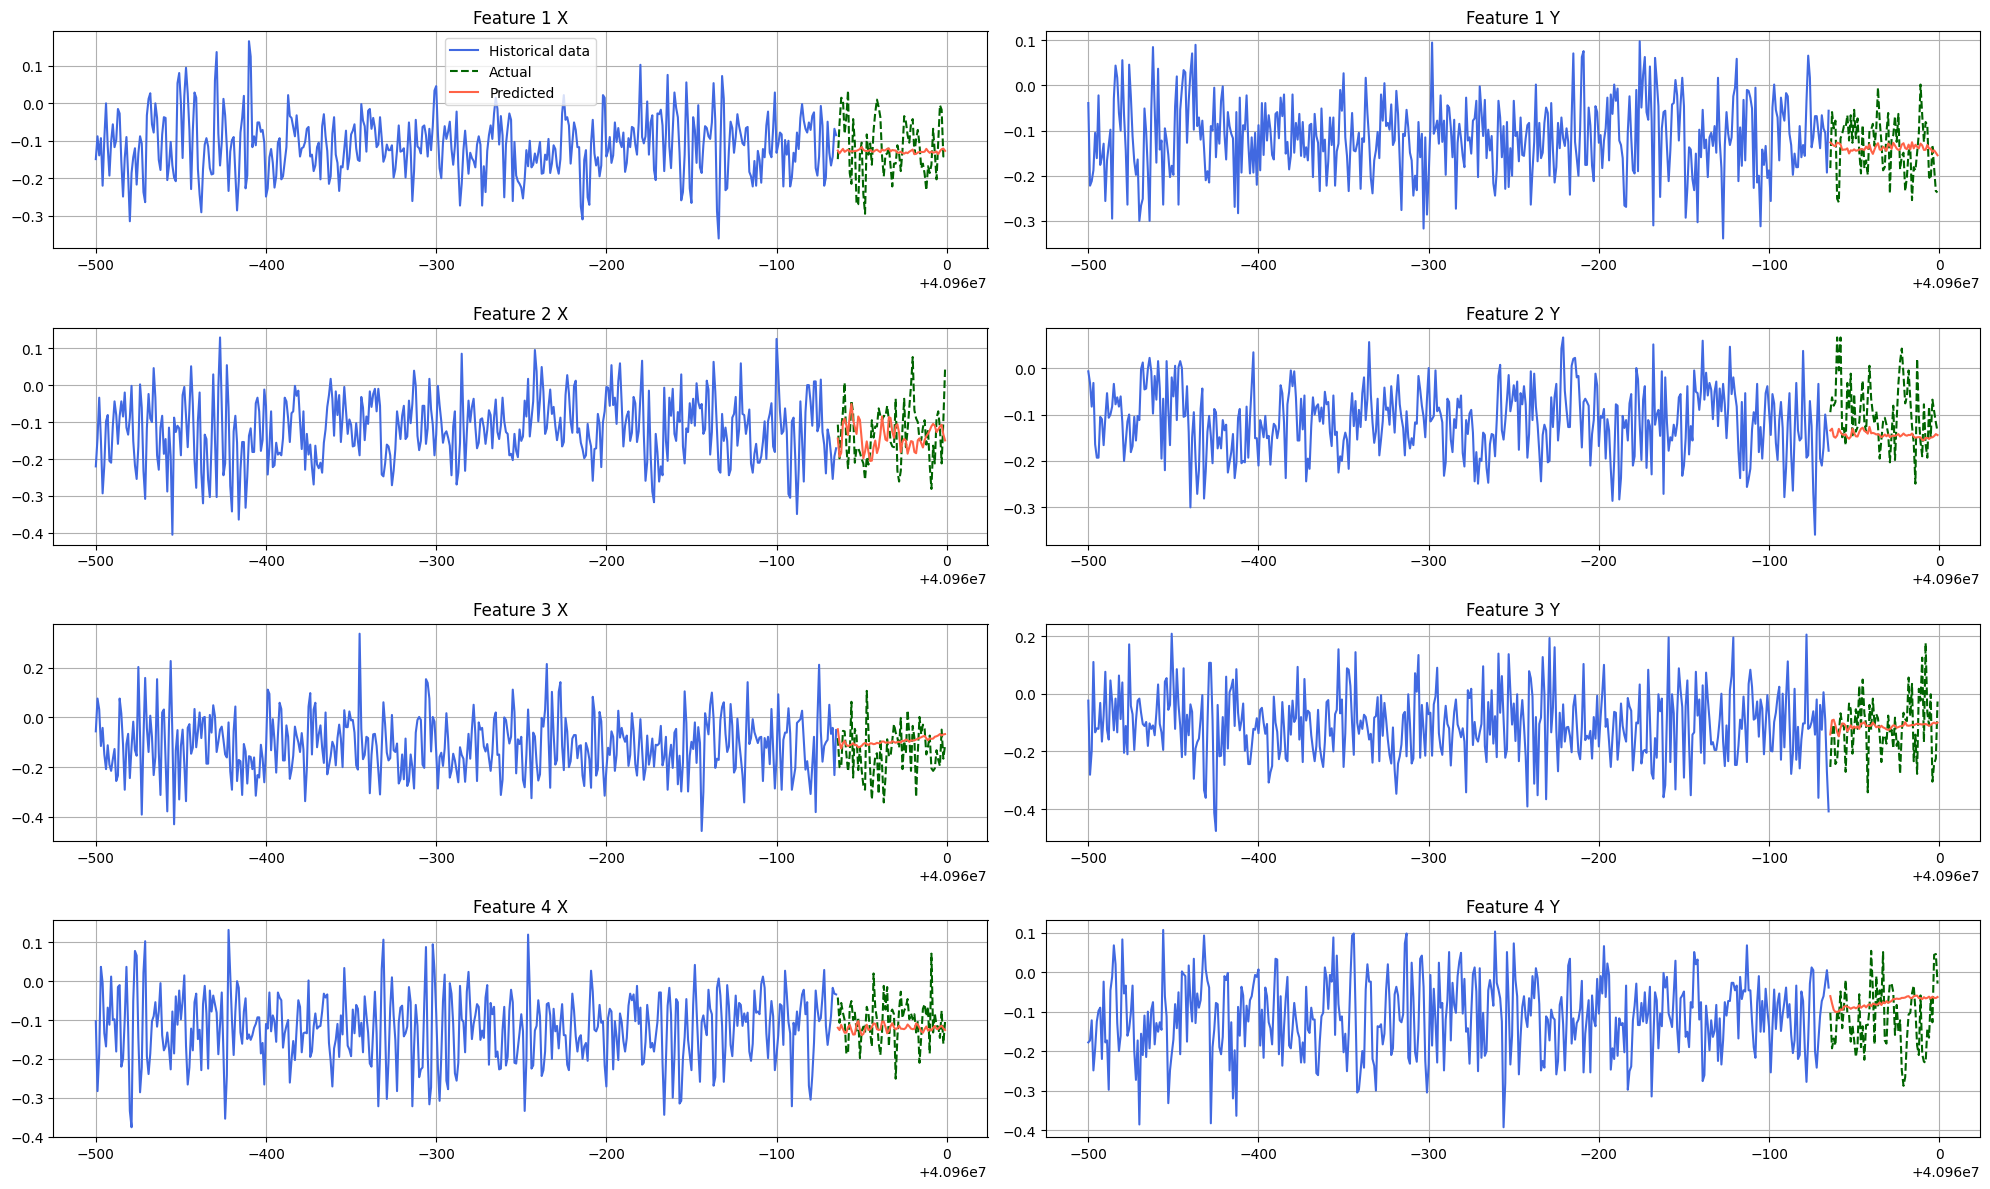

In [12]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set1).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_base.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set1
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(20, 12))
total_data_length = len(train_data_set1) + len(test_data_set1)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1] // 2, 2, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set1))
    limited_test_indices = np.arange(len(train_data_set1), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set1[start_idx - len(train_data_set1):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i // 2 + 1} {'X' if i % 2 == 0 else 'Y'}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE LARGE

Mean Absolute Error (MAE) per feature: [0.06355629 0.05117594 0.06130876 0.06138274 0.07733562 0.07526177
 0.04494724 0.07495806]


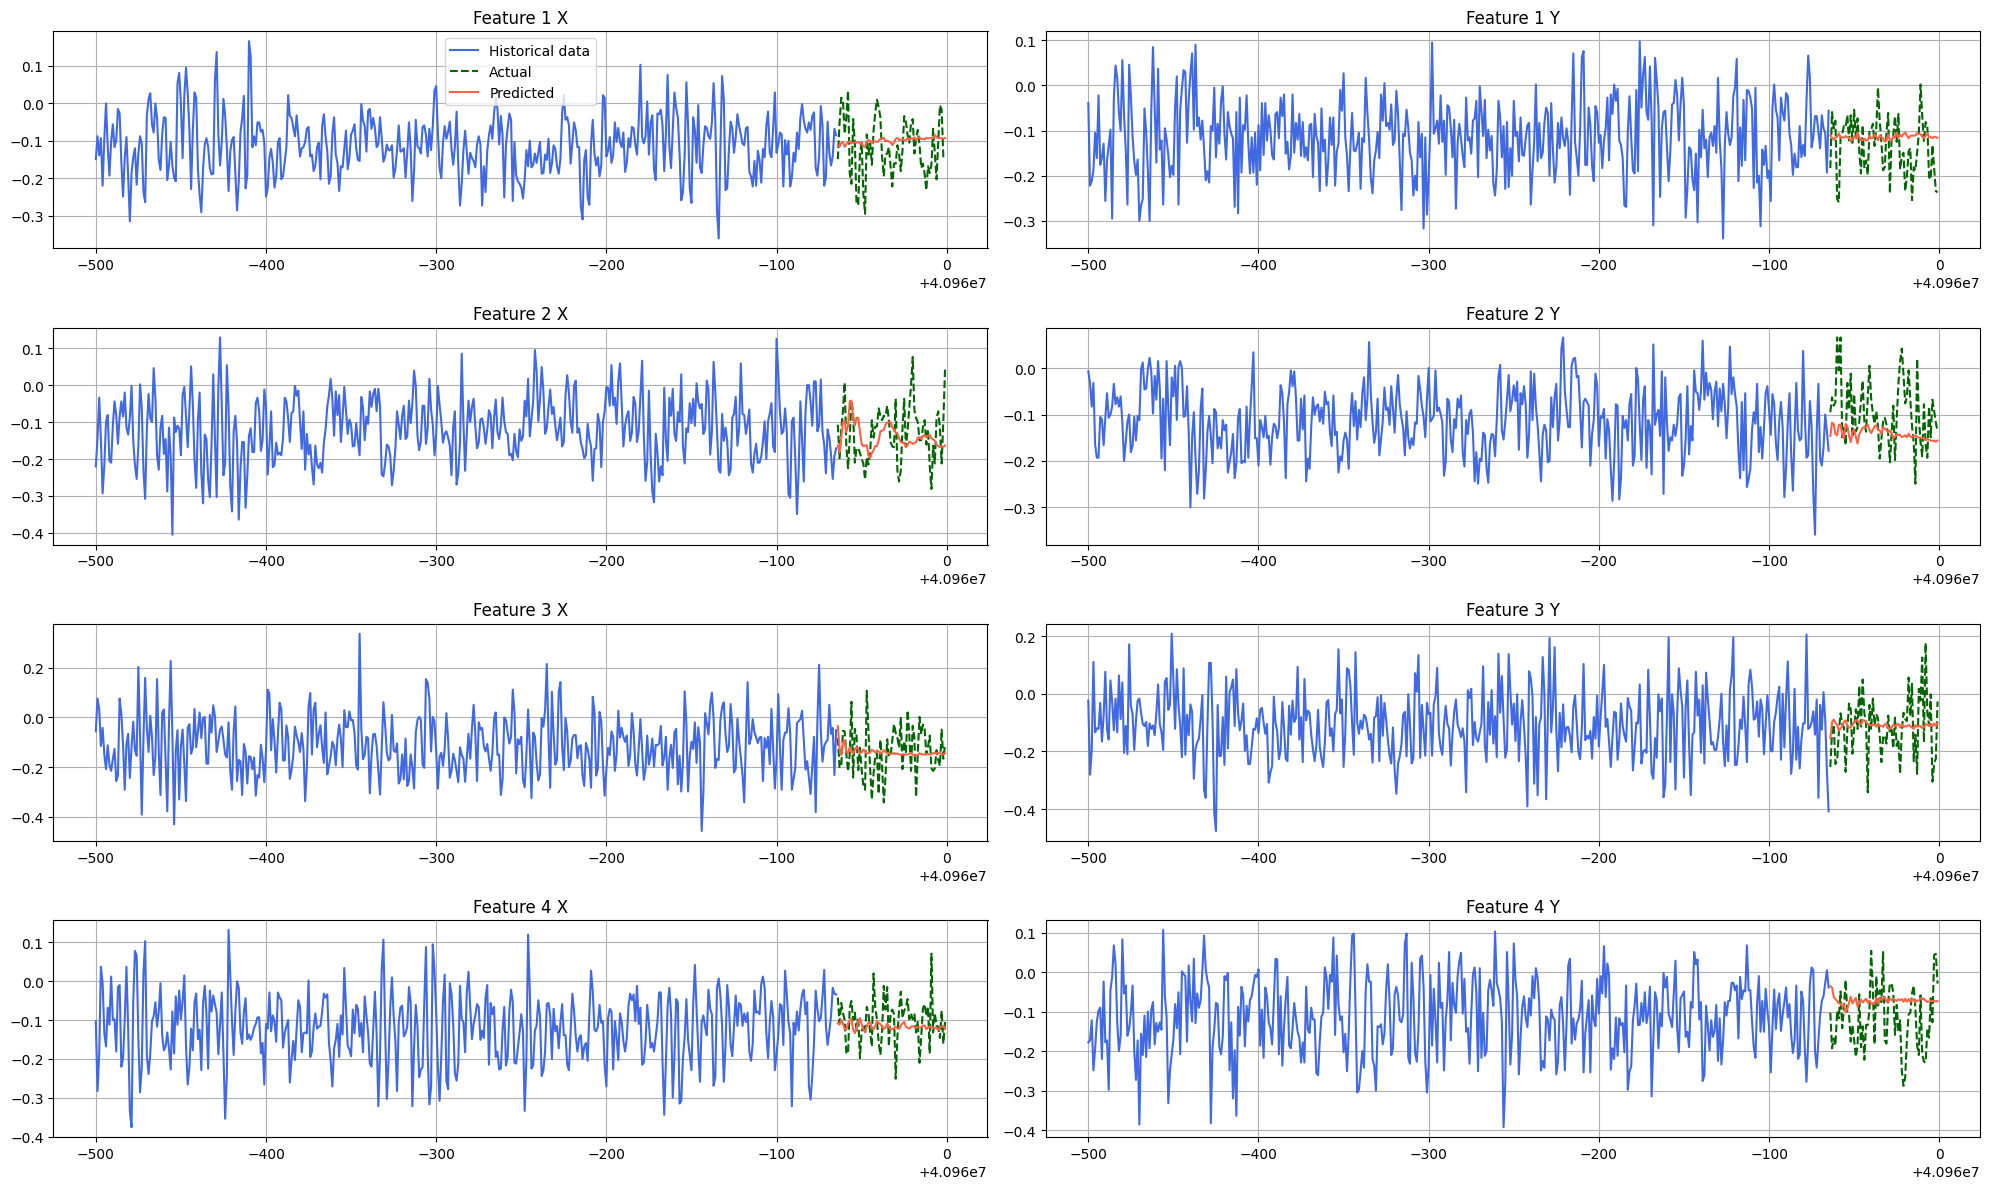

In [13]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set1).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_large.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set1
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(20, 12))
total_data_length = len(train_data_set1) + len(test_data_set1)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1] // 2, 2, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set1))
    limited_test_indices = np.arange(len(train_data_set1), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set1[start_idx - len(train_data_set1):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i // 2 + 1} {'X' if i % 2 == 0 else 'Y'}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


## USO LE PIPELINE SUL SET 2

#### PIPELINE TINY

Mean Absolute Error (MAE) per feature: [0.2338629  0.1360932  0.13737392 0.13484197]


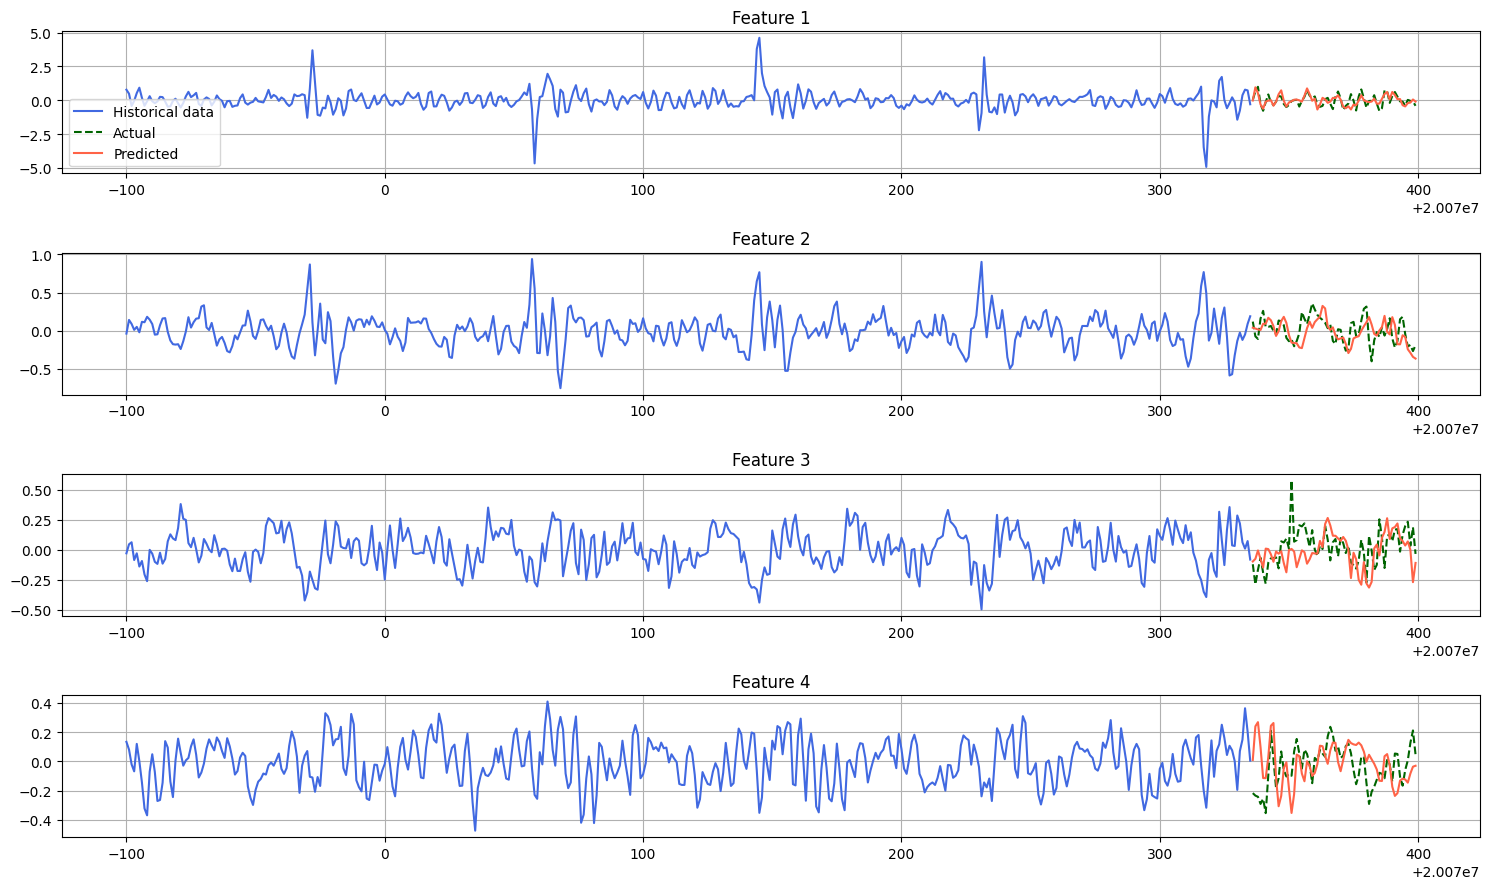

In [14]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set2).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_tiny.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set2
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set2) + len(test_data_set2)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set2))
    limited_test_indices = np.arange(len(train_data_set2), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set2[start_idx - len(train_data_set2):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE MINI

Mean Absolute Error (MAE) per feature: [0.22222365 0.14309734 0.12498891 0.09928727]


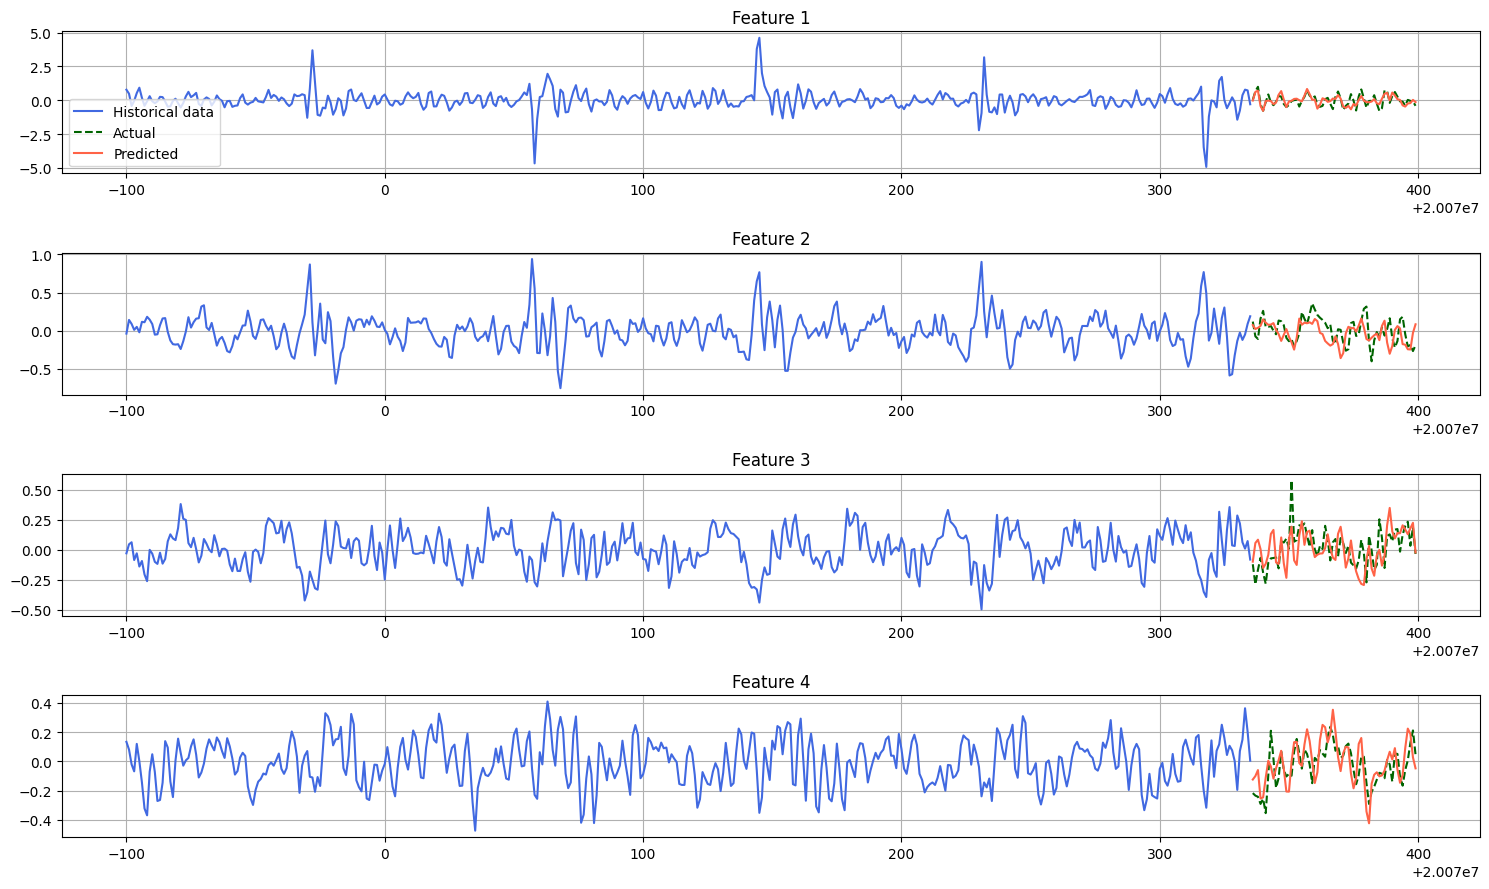

In [15]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set2).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_mini.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set2
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set2) + len(test_data_set2)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set2))
    limited_test_indices = np.arange(len(train_data_set2), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set2[start_idx - len(train_data_set2):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE SMALL

Mean Absolute Error (MAE) per feature: [0.21146554 0.15877722 0.12360972 0.09274461]


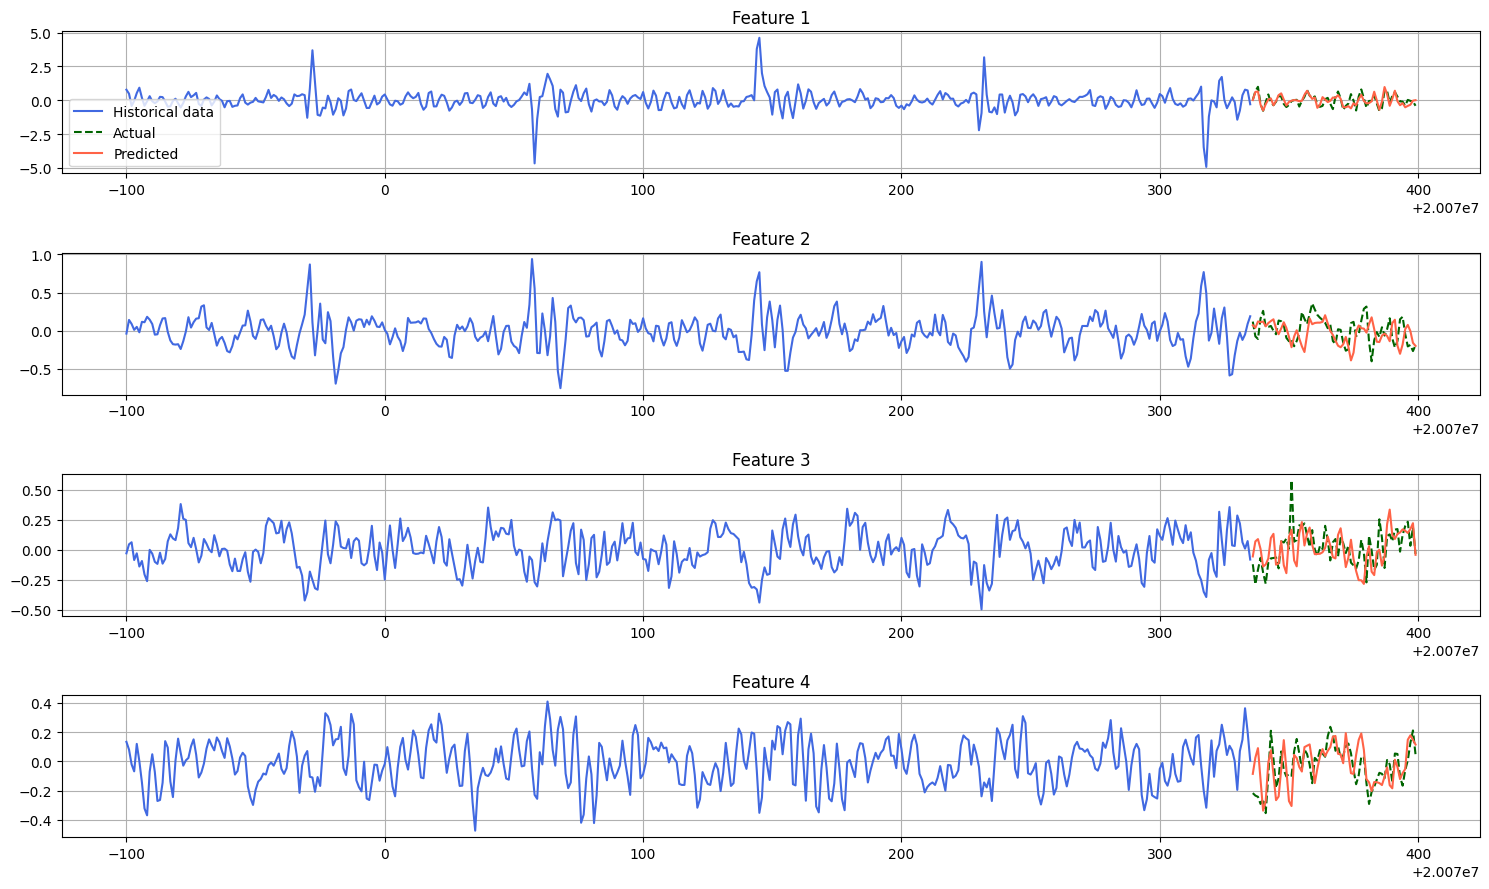

In [16]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set2).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_small.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set2
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set2) + len(test_data_set2)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set2))
    limited_test_indices = np.arange(len(train_data_set2), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set2[start_idx - len(train_data_set2):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE BASE

Mean Absolute Error (MAE) per feature: [0.24688955 0.09102791 0.17082404 0.10131616]


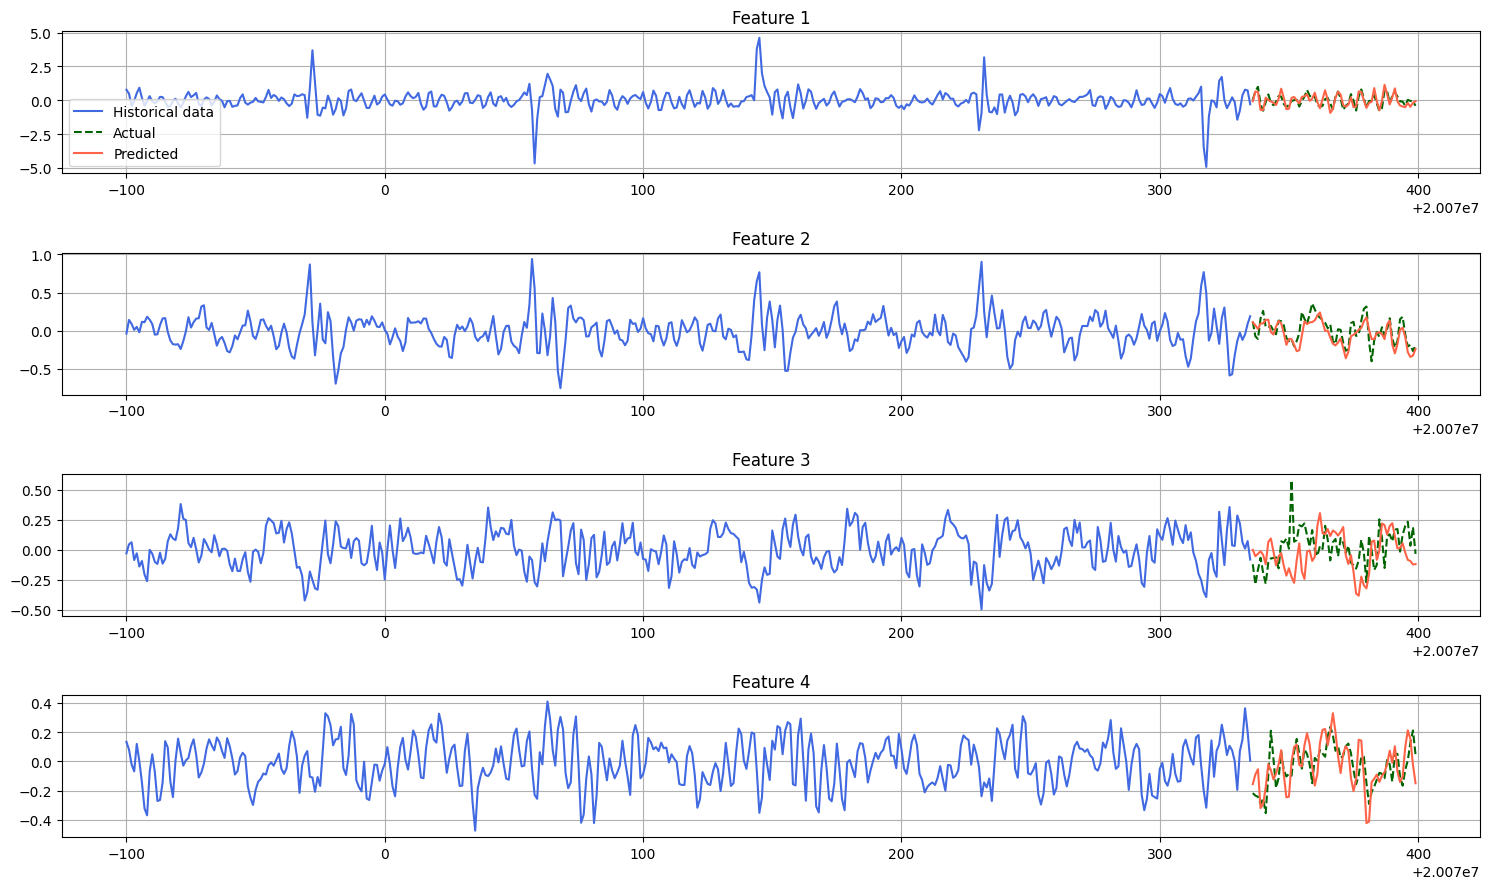

In [17]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set2).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_base.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set2
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set2) + len(test_data_set2)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set2))
    limited_test_indices = np.arange(len(train_data_set2), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set2[start_idx - len(train_data_set2):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE LARGE

Mean Absolute Error (MAE) per feature: [0.22946129 0.09463846 0.10561099 0.09784765]


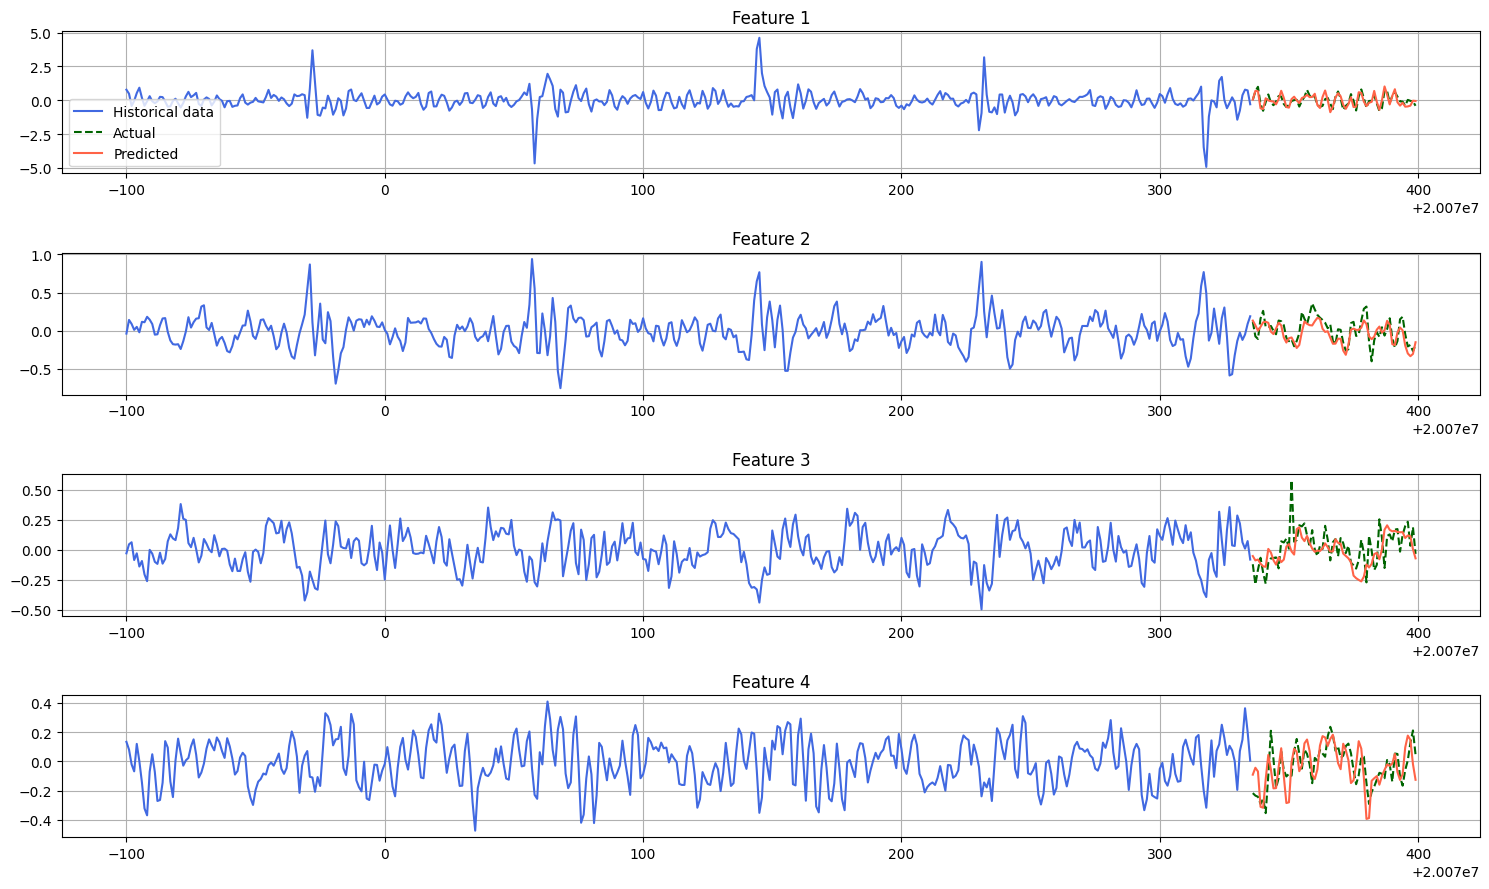

In [18]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set2).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_large.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set2
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set2) + len(test_data_set2)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set2))
    limited_test_indices = np.arange(len(train_data_set2), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set2[start_idx - len(train_data_set2):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


## USO LE PIPELINE SUL SET 3

#### PIPELINE TINY

Mean Absolute Error (MAE) per feature: [0.0880186  0.06274157 0.05388464 0.04526729]


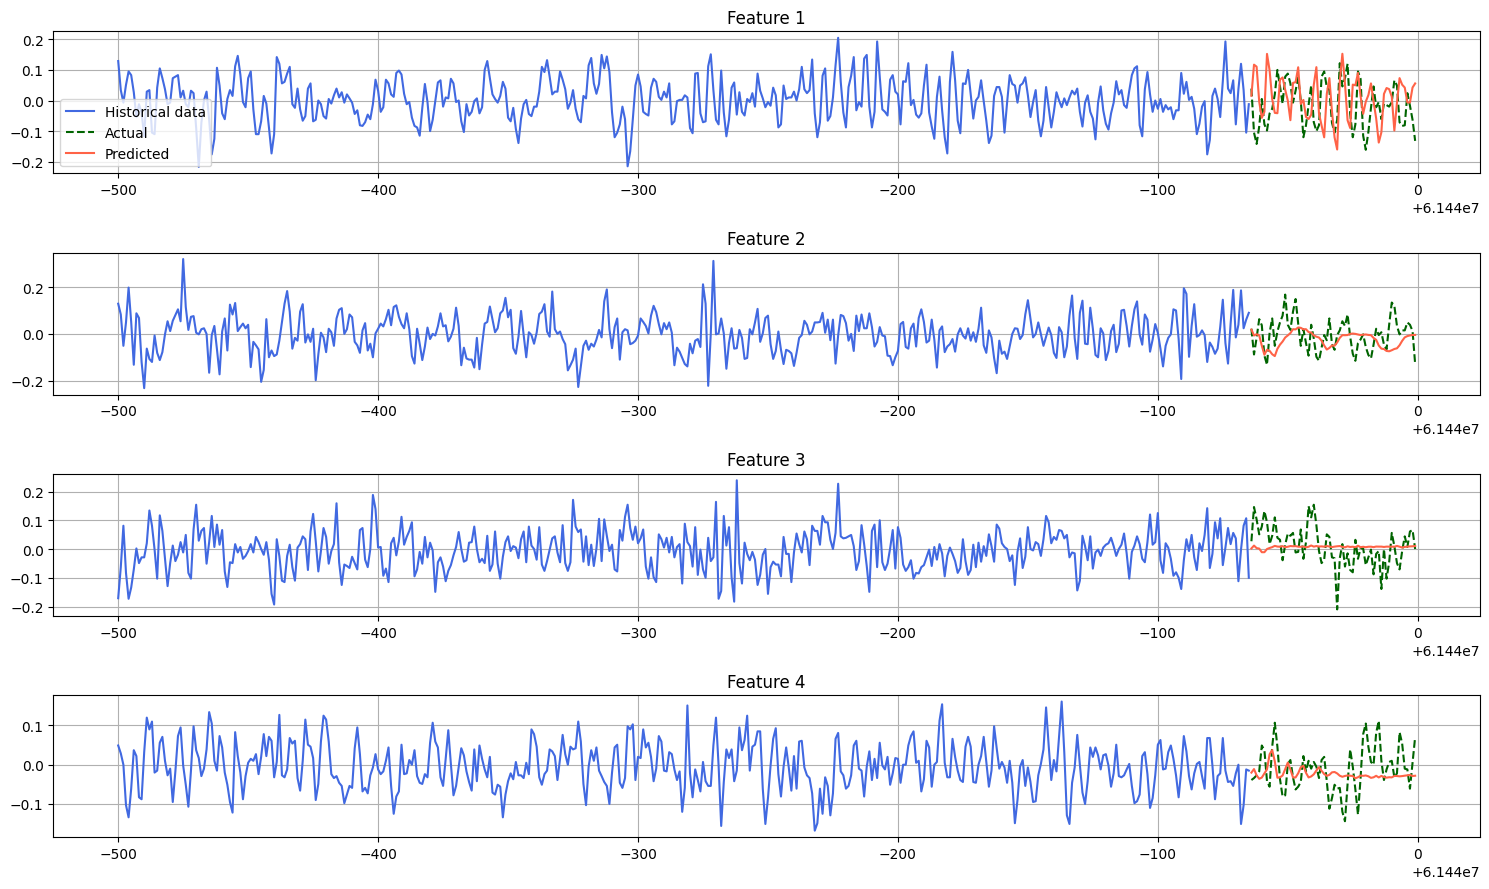

In [19]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set3).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_tiny.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set3
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set3) + len(test_data_set3)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set3))
    limited_test_indices = np.arange(len(train_data_set3), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set3[start_idx - len(train_data_set3):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE MINI

Mean Absolute Error (MAE) per feature: [0.07024128 0.04417919 0.06317317 0.04816783]


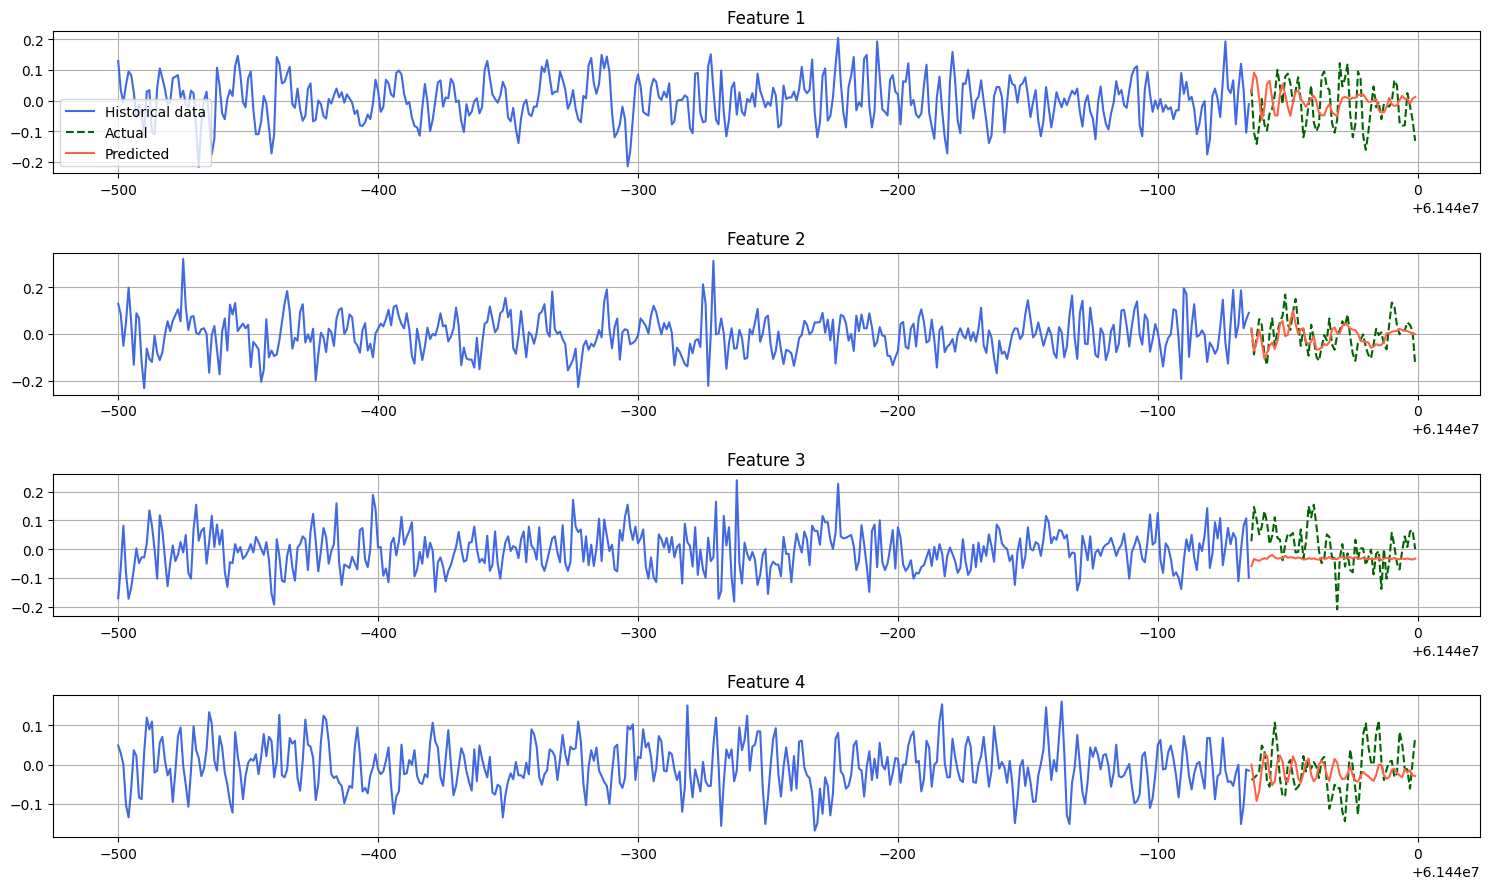

In [20]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set3).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_mini.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set3
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set3) + len(test_data_set3)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set3))
    limited_test_indices = np.arange(len(train_data_set3), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set3[start_idx - len(train_data_set3):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE SMALL

Mean Absolute Error (MAE) per feature: [0.06661528 0.05234974 0.05611887 0.04550327]


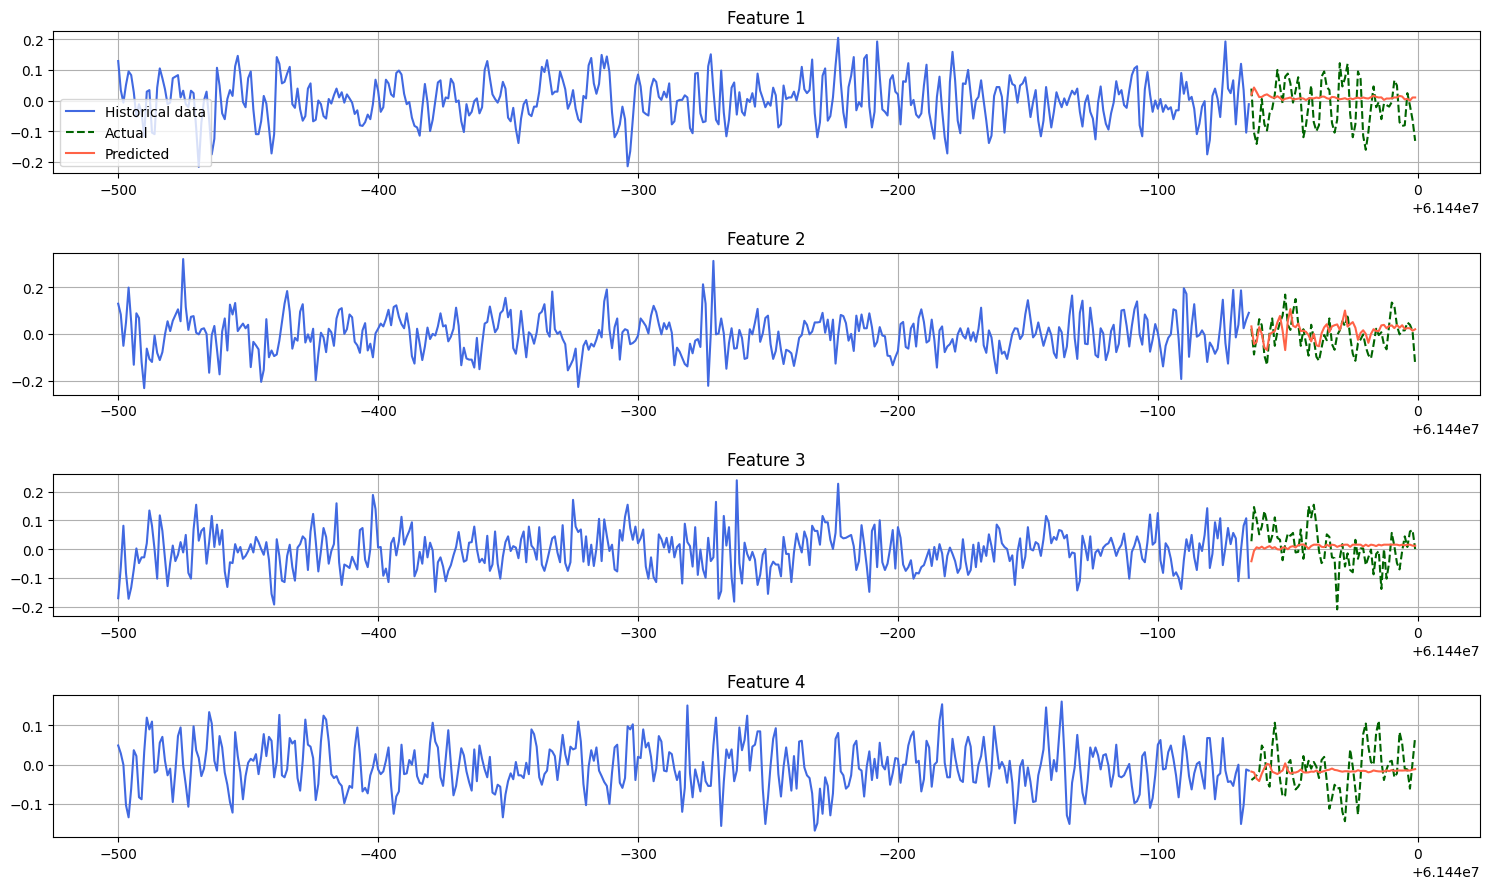

In [21]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set3).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_small.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set3
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set3) + len(test_data_set3)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set3))
    limited_test_indices = np.arange(len(train_data_set3), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set3[start_idx - len(train_data_set3):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE BASE

Mean Absolute Error (MAE) per feature: [0.06640437 0.04819343 0.05433258 0.04485325]


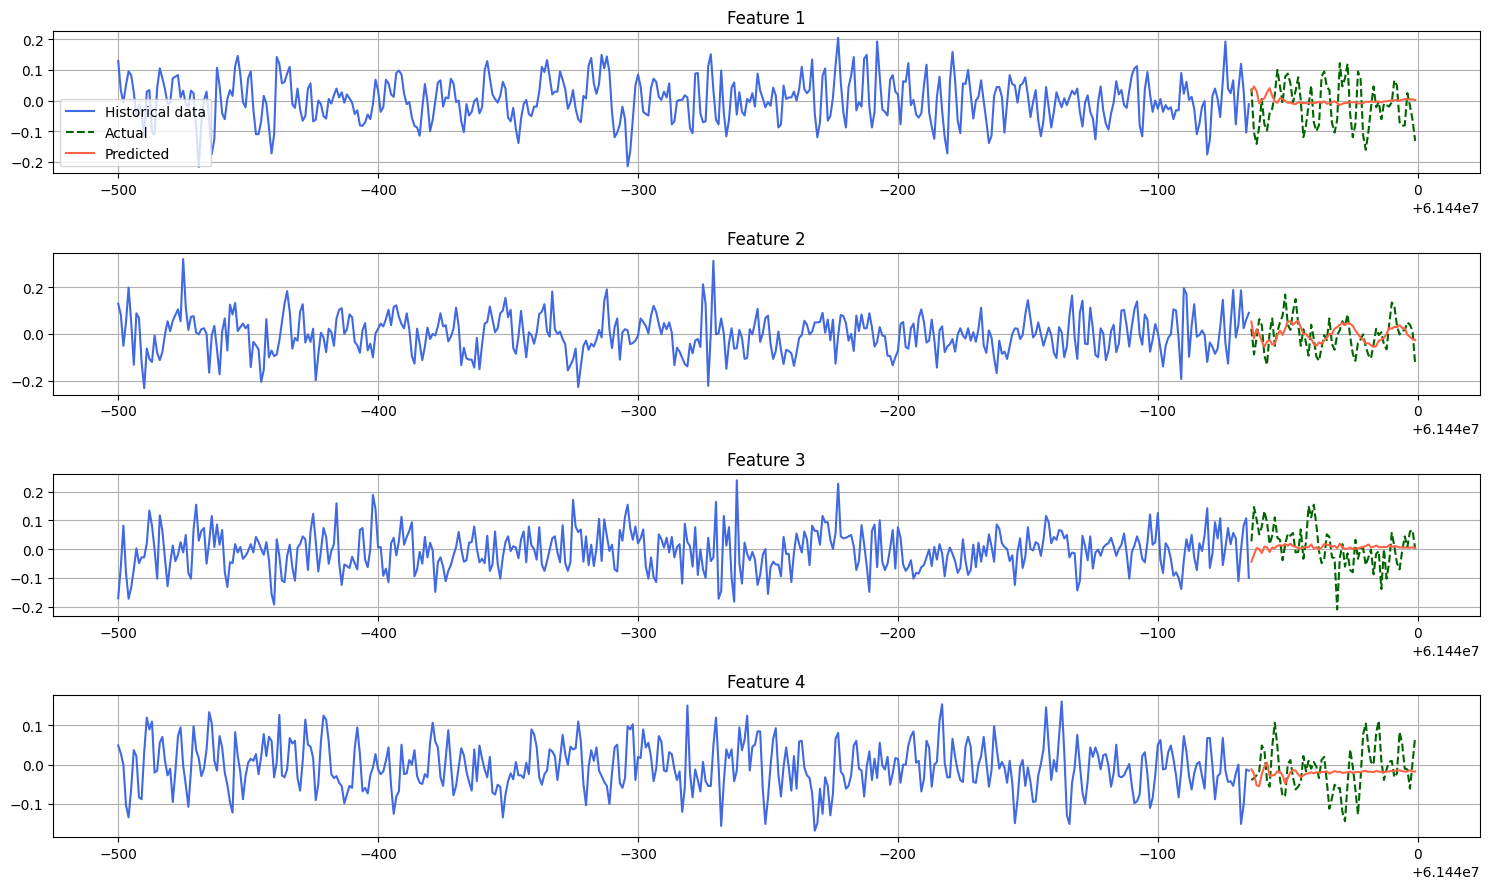

In [22]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set3).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_base.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set3
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set3) + len(test_data_set3)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set3))
    limited_test_indices = np.arange(len(train_data_set3), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set3[start_idx - len(train_data_set3):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


#### PIPELINE LARGE

Mean Absolute Error (MAE) per feature: [0.06361479 0.05470669 0.05367841 0.04264104]


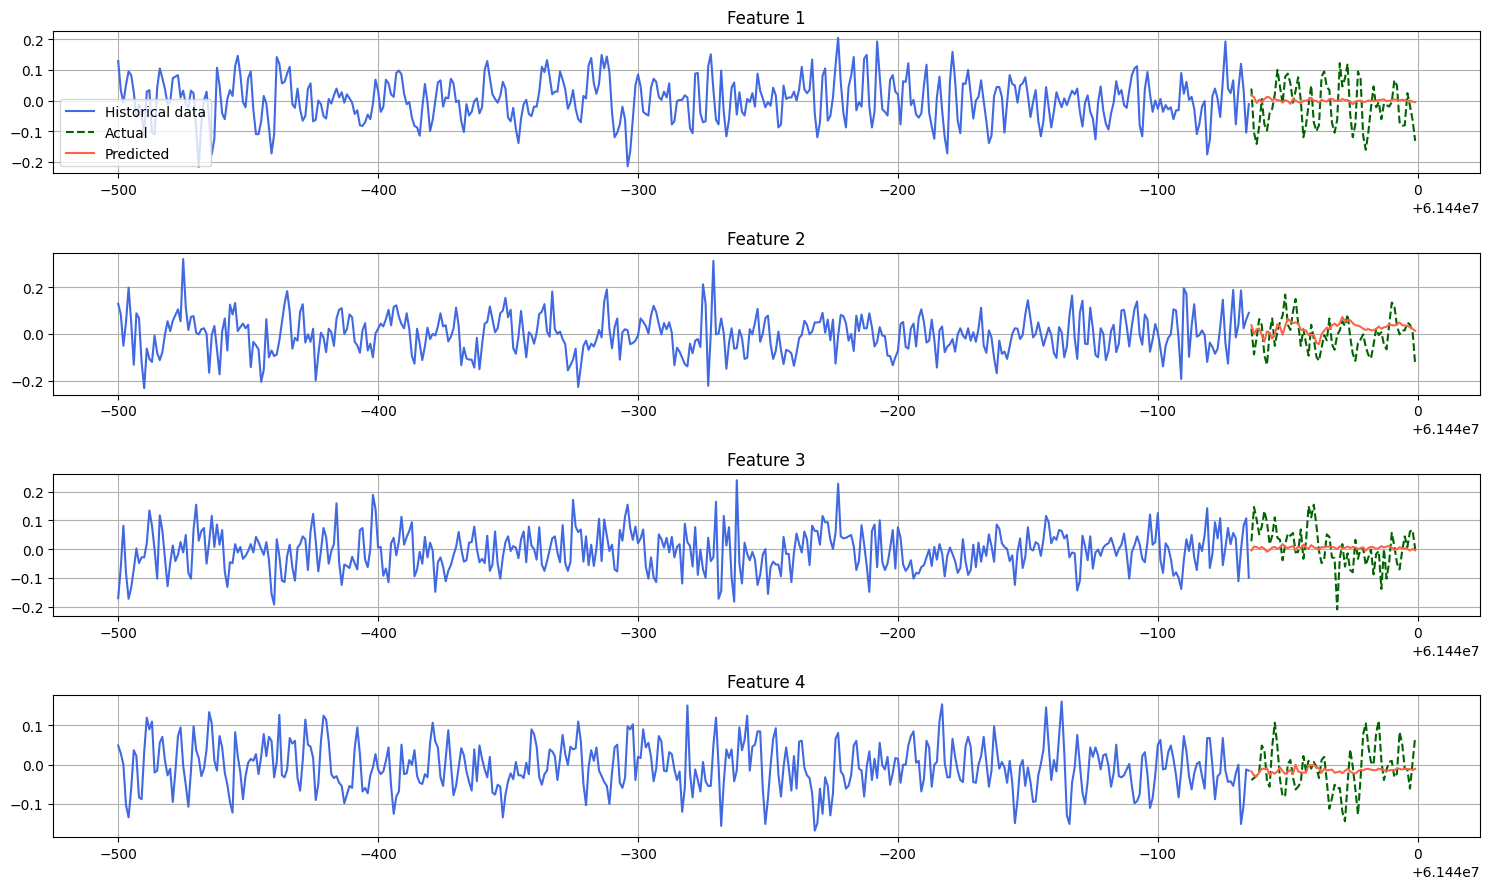

In [23]:
# Prepara i dati per il forecasting
context = torch.tensor(train_data_set3).float().T

# Esegui il forecasting per ogni colonna
forecast_segment = pipeline_large.predict(
    context=context,
    prediction_length=n_test,               # Lunghezza della previsione
    num_samples=40                          # Numero di campioni per la previsione
)
forecasts = forecast_segment.numpy()

# Calcola l'errore medio di previsione per ogni feature
predicted = np.median(forecasts, axis=1).T
actual = test_data_set3
mae = np.mean(np.abs(predicted - actual), axis=0)
print(f"Mean Absolute Error (MAE) per feature: {mae}")

# Grafica dei risultati per ogni feature
plt.figure(figsize=(15, 9))
total_data_length = len(train_data_set3) + len(test_data_set3)
start_idx = max(0, total_data_length - 500)

for i in range(actual.shape[1]):
    plt.subplot(actual.shape[1], 1, i + 1)
    
    # Indici limitati per la visualizzazione
    limited_train_indices = np.arange(start_idx, len(train_data_set3))
    limited_test_indices = np.arange(len(train_data_set3), total_data_length)

    # Plot dei dati storici (solo gli ultimi punti)
    plt.plot(limited_train_indices, train_data_set3[start_idx - len(train_data_set3):, i], color="royalblue", label="Historical data")
    
    # Plot dei dati effettivi e previsti (test)
    plt.plot(limited_test_indices, actual[:, i], color="darkgreen", linestyle='--', label="Actual")
    plt.plot(limited_test_indices, predicted[:, i], color="tomato", label="Predicted")
    
    # Imposta il titolo e la legenda
    plt.title(f"Feature {i + 1}")
    if i == 0:
        plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()
